In [1]:
import pyarrow.feather as feather
import seaborn as sns
import matplotlib.pyplot as plt

/home/dondon/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def table_to_gmm_scores(table):
    scores = []
    for chunk in table:
        for read in chunk:
            for score in read["scores"]:
                signal_score = score["signal_score"].as_py()
                kmer = score["kmer"]
                if signal_score is not None:
                    scores.append(signal_score)
    return scores

In [3]:
zero = feather.read_table("unique.0.score")
twenty = feather.read_table("unique.20.score")
hund = feather.read_table("unique.100.score")
fhund = feather.read_table("unique.500.score")

In [4]:
zero_scores = table_to_gmm_scores(zero)
fhund_scores = table_to_gmm_scores(fhund)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


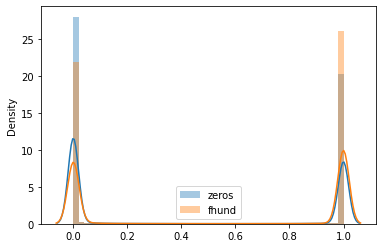

In [5]:
sns.distplot(zero_scores, label="zeros")
sns.distplot(fhund_scores, label="fhund")
plt.legend()

In [6]:
inf_0 = feather.read_table("informative_only.unique.0.score")
inf_20 = feather.read_table("informative_only.unique.20.score")
inf_100 = feather.read_table("informative_only.unique.100.score")
inf_500 = feather.read_table("informative_only.unique.500.score")

In [7]:
inf_0_scores = table_to_gmm_scores(inf_0)
inf_500_scores = table_to_gmm_scores(inf_500)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


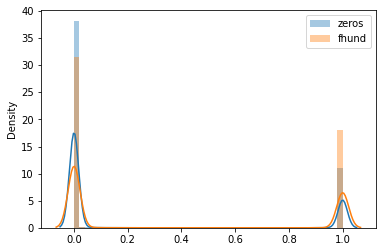

In [8]:
sns.distplot(inf_0_scores, label="zeros")
sns.distplot(inf_500_scores, label="fhund")
plt.legend()

In [12]:
inf_0_nocut = feather.read_table("nocut.informative_only.unique.0.score")
inf_500_nocut = feather.read_table("nocut.informative_only.unique.500.score")

In [13]:
inf_0_scores_nocut = table_to_gmm_scores(inf_0_nocut)
inf_500_scores_nocut = table_to_gmm_scores(inf_500_nocut)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


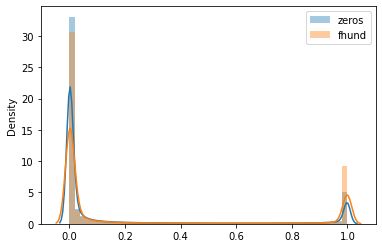

In [14]:
sns.distplot(inf_0_scores_nocut, label="zeros")
sns.distplot(inf_500_scores_nocut, label="fhund")
plt.legend()

## Filtered results

### Read Lengths

In [6]:
fhund_gt_10kb = "/scratch/bsaintjo/220525_unique_cawlr/filtered.rl_gt10000.nocut.informative_only.unique.500.score"
zero_gt_10kb = "/scratch/bsaintjo/220525_unique_cawlr/filtered.rl_gt10000.nocut.informative_only.unique.0.score"

In [7]:
fhund_gt_10kb = feather.read_table(fhund_gt_10kb)
zero_gt_10kb = feather.read_table(zero_gt_10kb)

In [8]:
zero_gt_10kb_vs = table_to_gmm_scores(zero_gt_10kb)

In [9]:
fhund_gt_10kb_vs = table_to_gmm_scores(fhund_gt_10kb)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


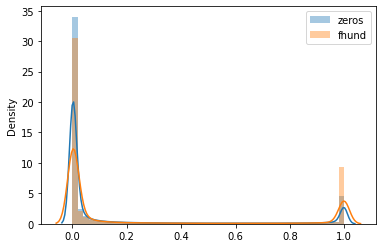

In [10]:
sns.distplot(zero_gt_10kb_vs, label="zeros")
sns.distplot(fhund_gt_10kb_vs, label="fhund")
plt.legend()

## MESMLR-seq data

In [1]:
mesmlr_neg_ctrl = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.arrow"
mesmlr_pos_ctrl = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.arrow"

In [4]:
mesmlr_neg_ctrl = feather.read_table(mesmlr_neg_ctrl)
mesmlr_pos_ctrl = feather.read_table(mesmlr_pos_ctrl)

In [6]:
mesmlr_neg_scores = table_to_gmm_scores(mesmlr_neg_ctrl)
mesmlr_pos_scores = table_to_gmm_scores(mesmlr_pos_ctrl)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


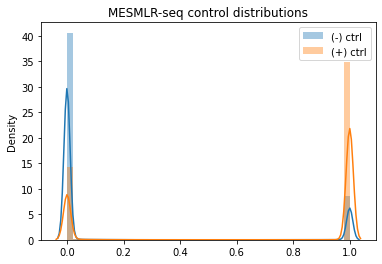

In [7]:
sns.distplot(mesmlr_neg_scores, label="(-) ctrl")
sns.distplot(mesmlr_pos_scores, label="(+) ctrl")
plt.title("MESMLR-seq control distributions")
plt.legend()

## MESMLR cutoff data

In [3]:
mesmlr_neg_ctrl_cutoff_0 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.0.arrow"
mesmlr_neg_ctrl_cutoff_5 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_5.0.arrow"
mesmlr_neg_ctrl_cutoff_10 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_10.0.arrow"
mesmlr_neg_ctrl_cutoff_20 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_20.0.arrow"


In [4]:

mesmlr_pos_ctrl_cutoff_0 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.0.arrow"
mesmlr_pos_ctrl_cutoff_5 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_5.0.arrow"
mesmlr_pos_ctrl_cutoff_10 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_10.0.arrow"
mesmlr_pos_ctrl_cutoff_20 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_20.0.arrow"


In [5]:
mesmlr_neg_ctrl_cutoff_0 = feather.read_table(mesmlr_neg_ctrl_cutoff_0)
mesmlr_neg_ctrl_cutoff_5 = feather.read_table(mesmlr_neg_ctrl_cutoff_5)
mesmlr_neg_ctrl_cutoff_10 = feather.read_table(mesmlr_neg_ctrl_cutoff_10)
mesmlr_neg_ctrl_cutoff_20 = feather.read_table(mesmlr_neg_ctrl_cutoff_20)

In [6]:
mesmlr_pos_ctrl_cutoff_0 = feather.read_table(mesmlr_pos_ctrl_cutoff_0)
mesmlr_pos_ctrl_cutoff_5 = feather.read_table(mesmlr_pos_ctrl_cutoff_5)
mesmlr_pos_ctrl_cutoff_10 = feather.read_table(mesmlr_pos_ctrl_cutoff_10)
mesmlr_pos_ctrl_cutoff_20 = feather.read_table(mesmlr_pos_ctrl_cutoff_20)

In [7]:
mesmlr_neg_scores_cutoff_0 = table_to_gmm_scores(mesmlr_neg_ctrl_cutoff_0)
mesmlr_neg_scores_cutoff_5 = table_to_gmm_scores(mesmlr_neg_ctrl_cutoff_5)
mesmlr_neg_scores_cutoff_10 = table_to_gmm_scores(mesmlr_neg_ctrl_cutoff_10)
mesmlr_neg_scores_cutoff_20 = table_to_gmm_scores(mesmlr_neg_ctrl_cutoff_20)

In [8]:
mesmlr_pos_scores_cutoff_0 = table_to_gmm_scores(mesmlr_pos_ctrl_cutoff_0)
mesmlr_pos_scores_cutoff_5 = table_to_gmm_scores(mesmlr_pos_ctrl_cutoff_5)
mesmlr_pos_scores_cutoff_10 = table_to_gmm_scores(mesmlr_pos_ctrl_cutoff_10)
mesmlr_pos_scores_cutoff_20 = table_to_gmm_scores(mesmlr_pos_ctrl_cutoff_20)

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


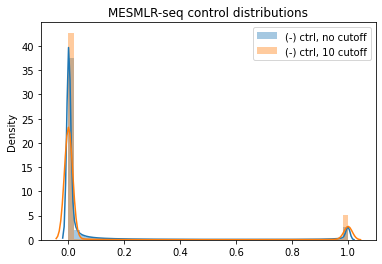

In [10]:
sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

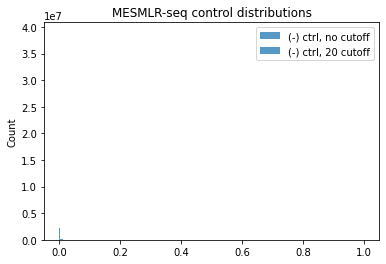

In [9]:

sns.histplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
sns.histplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


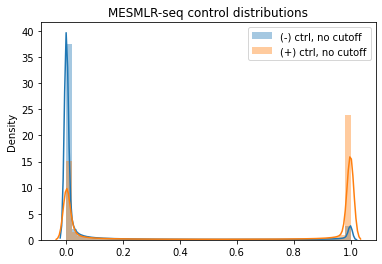

In [13]:
sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


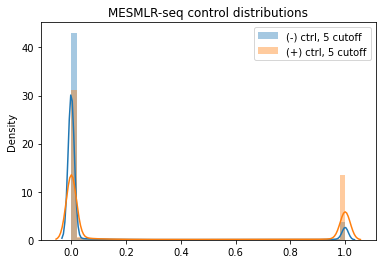

In [14]:

# sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


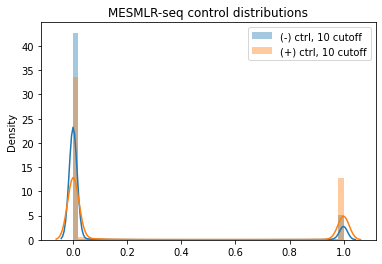

In [15]:
# sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


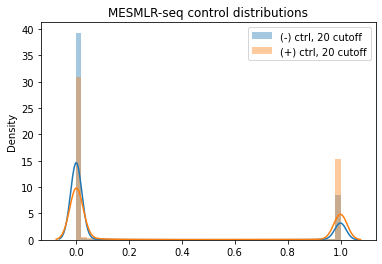

In [16]:
# sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, no cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_5, label="(-) ctrl, 5 cutoff")
# sns.distplot(mesmlr_neg_scores_cutoff_10, label="(-) ctrl, 10 cutoff")
sns.distplot(mesmlr_neg_scores_cutoff_20, label="(-) ctrl, 20 cutoff")

# sns.distplot(mesmlr_pos_scores_cutoff_0, label="(+) ctrl, no cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_5, label="(+) ctrl, 5 cutoff")
# sns.distplot(mesmlr_pos_scores_cutoff_10, label="(+) ctrl, 10 cutoff")
sns.distplot(mesmlr_pos_scores_cutoff_20, label="(+) ctrl, 20 cutoff")
plt.title("MESMLR-seq control distributions")
plt.legend()

## MESMLR p-value cutoffs

In [1]:
mesmlr_neg_ctrl_pvt_7em1 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.7.arrow"
mesmlr_neg_ctrl_pvt_3em1 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.3.arrow"
mesmlr_neg_ctrl_pvt_1em1 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.1.arrow"
mesmlr_neg_ctrl_pvt_5em2 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.005.arrow"
mesmlr_neg_ctrl_pvt_5em3 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.0005.arrow"
mesmlr_neg_ctrl_pvt_5em4 = "/scratch/bsaintjo/mesmlr_output_220622/neg.score.cutoff_0.pvt_0.00005.arrow"

mesmlr_pos_ctrl_pvt_7em1 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.7.arrow"
mesmlr_pos_ctrl_pvt_3em1 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.3.arrow"
mesmlr_pos_ctrl_pvt_1em1 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.1.arrow"
mesmlr_pos_ctrl_pvt_5em2 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.005.arrow"
mesmlr_pos_ctrl_pvt_5em3 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.0005.arrow"
mesmlr_pos_ctrl_pvt_5em4 = "/scratch/bsaintjo/mesmlr_output_220622/pos.score.cutoff_0.pvt_0.00005.arrow"

In [11]:
mesmlr_neg_ctrl_pvts = [feather.read_table(filename) for filename in [mesmlr_neg_ctrl_pvt_5em2, mesmlr_neg_ctrl_pvt_5em3, mesmlr_neg_ctrl_pvt_5em4]]

In [12]:
mesmlr_pos_ctrl_pvts = [feather.read_table(filename) for filename in [mesmlr_pos_ctrl_pvt_5em2, mesmlr_pos_ctrl_pvt_5em3, mesmlr_pos_ctrl_pvt_5em4]]

In [13]:
thresholds = [0.005, 0.0005, 0.00005]

In [15]:
mesmlr_neg_ctrl_pvt_scores = {threshold: table_to_gmm_scores(feather) for threshold, feather in zip(thresholds, mesmlr_neg_ctrl_pvts)}

In [16]:
mesmlr_pos_ctrl_pvt_scores = {threshold: table_to_gmm_scores(feather) for threshold, feather in zip(thresholds, mesmlr_pos_ctrl_pvts)}

/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/scratch/bsaintjo/score_explore/.venv/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


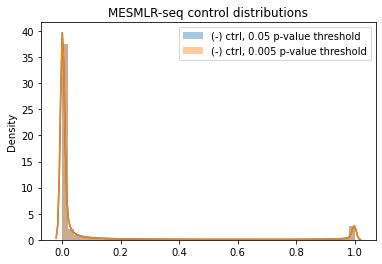

In [20]:
threshold = 0.005
sns.distplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, 0.05 p-value threshold")
sns.distplot(mesmlr_neg_ctrl_pvt_scores[threshold], label="(-) ctrl, {} p-value threshold".format(threshold))
plt.title("MESMLR-seq control distributions")
plt.legend()

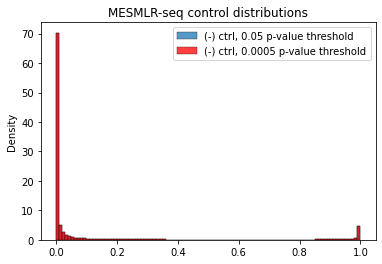

In [27]:
threshold = 0.0005
_, axs = plt.subplots(2, 1)
sns.histplot(mesmlr_neg_scores_cutoff_0, label="(-) ctrl, 0.05 p-value threshold", bins=100, stat="density", ax=axs[0])
sns.histplot(mesmlr_neg_ctrl_pvt_scores[threshold], label="(-) ctrl, {} p-value threshold".format(threshold), bins=100, stat="density", color="red", ax=axs[1])
plt.title("MESMLR-seq control distributions")
plt.legend()

In [28]:
import pandas as pd

In [29]:
mesmlr_neg_ctrl_pvt_scores[0.05] = mesmlr_neg_scores_cutoff_0
df = pd.DataFrame.from_dict(mesmlr_neg_ctrl_pvt_scores, orient="index").reset_index()
df.columns = ["threshold", "score"]
sns.histplot(data=df, x="score", hue="threshold", stat="density")

In [3]:
with open("/gicephfs/brookslab/bsaintjo/220516_ang_conc_unique/unique.0.eventalign.tsv", "r") as input_file:
    next(input_file)  # Skip header
    acc = []

    for line in input_file:
        if len(acc) > 100_000:
            break
        line = line.rstrip().split("\t")
        n_samples = len([x for x in line[-1].split(",")])
        acc.append(n_samples)

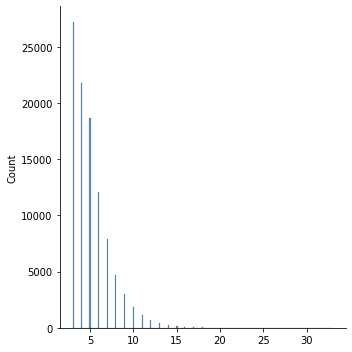

In [5]:
sns.displot(acc)

In [6]:
import random

In [13]:
sums = []
for _ in range(5000):
    sums.append(sum(random.choices(acc, k=75)))

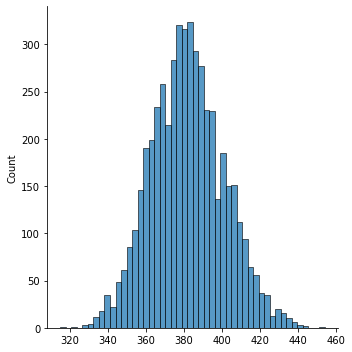

In [14]:
sns.displot(sums)

In [2]:
import pickle

In [4]:
with open("/home/dondon/Research/addseq/pos.model_scores.pickle", 'rb') as pfile:
    pos_model_scores = pickle.load(pfile)

with open("/home/dondon/Research/addseq/neg.model_scores.pickle", 'rb') as pfile:
    neg_model_scores = pickle.load(pfile)

In [32]:
len(pos_model_scores["bins"])
sum_pos_model_scores = sum(pos_model_scores["bins"])
norm_pos_model_scores = [x / sum_pos_model_scores for x in pos_model_scores["bins"]]

In [33]:
sum_neg_model_scores = sum(neg_model_scores["bins"])
norm_neg_model_scores = [x / sum_neg_model_scores for x in neg_model_scores["bins"]]

Text(0, 0.5, 'Density')

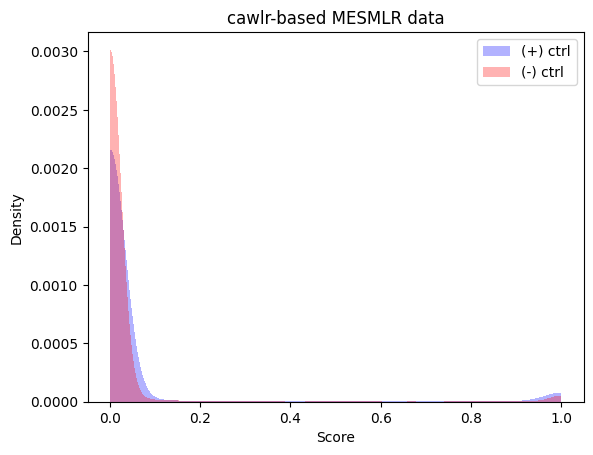

In [47]:
plt.bar(x=[a/10000 for a in range(0, 10000)], height=norm_pos_model_scores, width=0.0001, color="blue", alpha=0.3, label="(+) ctrl")
plt.bar(x=[a/10000 for a in range(0, 10000)], height=norm_neg_model_scores, width=0.0001, color="red", alpha=0.3, label="(-) ctrl")
plt.title("cawlr-based MESMLR data")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Density")

In [28]:
with open("/data/Research/cawlr/cawlr-rs/test_gen/pgc.score.orig.pickle", 'rb') as pfile:
    orig_pos_scores = pickle.load(pfile)

with open("/home/dondon/Research/cawlr/cawlr-rs/test_gen/neg.score.orig.pickle", 'rb') as pfile:
    orig_neg_scores = pickle.load(pfile)

Text(0, 0.5, 'Density')

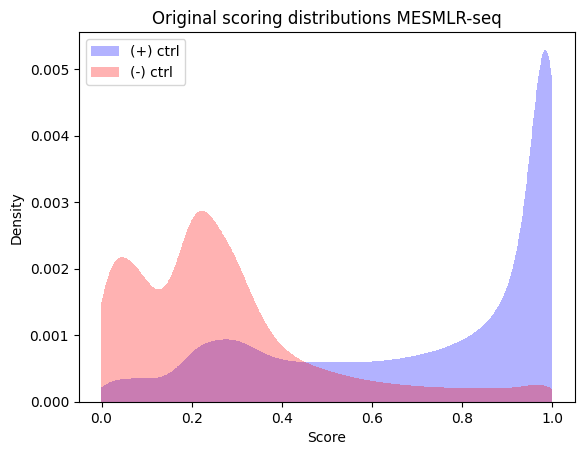

In [46]:
plt.bar(x=[a/1001 for a in range(0, 1001)], height=orig_pos_scores["bins"], width=1/1001, color="blue", alpha=0.3, label="(+) ctrl")
plt.bar(x=[a/1001 for a in range(0, 1001)], height=orig_neg_scores["bins"], width=1/1001, color="red", alpha=0.3, label="(-) ctrl")
plt.title("Original scoring distributions MESMLR-seq")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Density")

In [48]:
with open("/home/dondon/Research/addseq/orig.cawlr.pos.model_scores.pickle", 'rb') as pfile:
    orig_cawlr_pos_scores = pickle.load(pfile)

with open("/home/dondon/Research/addseq/orig.cawlr.neg.model_scores.pickle", 'rb') as pfile:
    orig_cawlr_neg_scores = pickle.load(pfile)

Text(0, 0.5, 'Density')

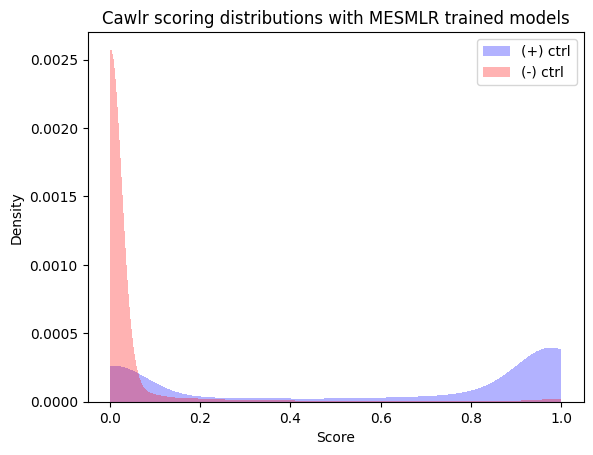

In [49]:
n_bins = len(orig_cawlr_neg_scores["bins"])
sum_pos = sum(orig_cawlr_pos_scores["bins"])
sum_neg = sum(orig_cawlr_neg_scores["bins"])
norm_orig_cawlr_pos_scores = [x/sum_pos for x in orig_cawlr_pos_scores["bins"]]
norm_orig_cawlr_neg_scores = [x/sum_neg for x in orig_cawlr_neg_scores["bins"]]
plt.bar(x=[a/n_bins for a in range(0, n_bins)], height=norm_orig_cawlr_pos_scores, width=1/n_bins, color="blue", alpha=0.3, label="(+) ctrl")
plt.bar(x=[a/n_bins for a in range(0, n_bins)], height=norm_orig_cawlr_neg_scores, width=1/n_bins, color="red", alpha=0.3, label="(-) ctrl")
plt.title("Cawlr scoring distributions with MESMLR trained models")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Density")